In [19]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
train_data_dir = '../data/localdata/chest_xray/train'
test_data_dir = '../data/localdata/chest_xray/test'

generator =ImageDataGenerator(rescale=1/255, validation_split=.25)

train_generator= generator.flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', subset='training', class_mode='binary')
validation_set=generator.flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', subset='validation', class_mode='binary')
test_generator = generator.flow_from_directory(
        test_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', class_mode='binary')

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 3913 images belonging to 2 classes.
Found 1303 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
train_images.shape

(32, 64, 64, 1)

In [21]:
def plot_loss_and_accuracy(results, final=False):
    
    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_precision = results.history['precision']
    val_precision = results.history['val_precision']
    train_accuracy = results.history['binary_accuracy']
    val_accuracy = results.history['val_binary_accuracy']

    # Setting up plots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    #Plotting precision
    ax2.set_title("Precision")
    sns.lineplot(x=results.epoch, y=train_precision, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_precision, ax=ax2, label=val_label)
    ax2.legend()
    
    # Plotting accuracy info
    ax3.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax3, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax3, label=val_label)
    ax3.legend()

#this function was adapted from Flatiron instructional materials

Epoch 1/10
123/123 [==============================] - 61s 496ms/step - loss: 0.6912 - precision: 0.7450 - binary_accuracy: 0.7255 - val_loss: 0.6686 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 2/10
123/123 [==============================] - 60s 492ms/step - loss: 0.6575 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6471 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 3/10
123/123 [==============================] - 61s 495ms/step - loss: 0.6380 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6295 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 4/10
123/123 [==============================] - 62s 506ms/step - loss: 0.6223 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6154 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 5/10
123/123 [==============================] - 60s 488ms/step - loss: 0.6096 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6040 - val_precision: 0.7429 - val_binary_ac

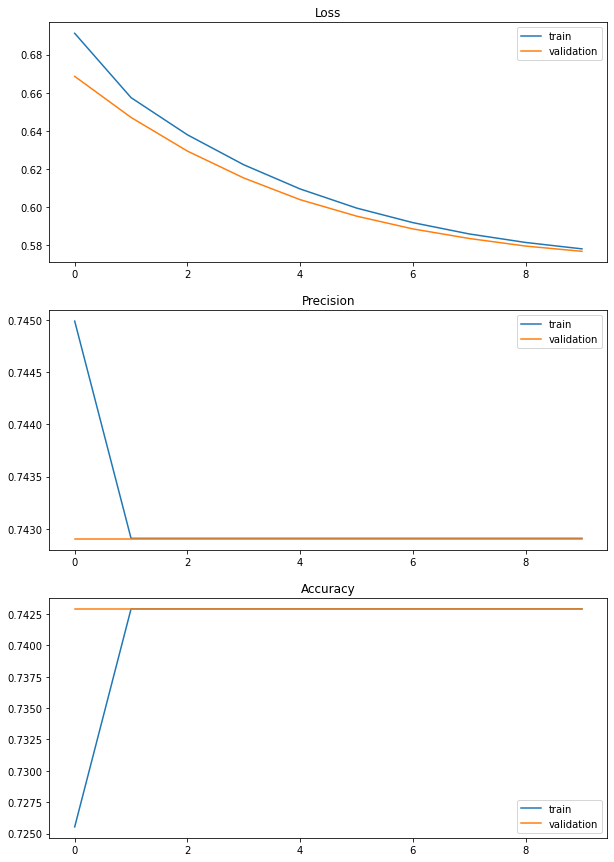

In [5]:
# simple_model = models.Sequential()
# simple_model.add(layers.Flatten())
# simple_model.add(Dense(12, activation='relu'))
# simple_model.add(Dense(1, activation='sigmoid'))

# simple_model.compile(optimizer='Adam',
#               loss='BinaryCrossentropy',
#               metrics=['Precision', 'BinaryAccuracy'])
                 
# results = simple_model.fit(train_generator, epochs=10, validation_data=validation_set)
# plot_loss_and_accuracy(results)

print('''Epoch 1/10
123/123 [==============================] - 61s 496ms/step - loss: 0.6912 - precision: 0.7450 - binary_accuracy: 0.7255 - val_loss: 0.6686 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 2/10
123/123 [==============================] - 60s 492ms/step - loss: 0.6575 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6471 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 3/10
123/123 [==============================] - 61s 495ms/step - loss: 0.6380 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6295 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 4/10
123/123 [==============================] - 62s 506ms/step - loss: 0.6223 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6154 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 5/10
123/123 [==============================] - 60s 488ms/step - loss: 0.6096 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6040 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 6/10
123/123 [==============================] - 61s 492ms/step - loss: 0.5996 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.5954 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 7/10
123/123 [==============================] - 60s 491ms/step - loss: 0.5920 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.5887 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 8/10
123/123 [==============================] - 61s 494ms/step - loss: 0.5861 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.5837 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 9/10
123/123 [==============================] - 62s 501ms/step - loss: 0.5816 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.5797 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 10/10
123/123 [==============================] - 68s 551ms/step - loss: 0.5782 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.5769 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
''')

Epoch 1/10
123/123 [==============================] - 68s 549ms/step - loss: 0.2655 - precision: 0.9048 - binary_accuracy: 0.8896 - val_loss: 0.1379 - val_precision: 0.9545 - val_binary_accuracy: 0.9478
Epoch 2/10
123/123 [==============================] - 66s 533ms/step - loss: 0.1017 - precision: 0.9740 - binary_accuracy: 0.9647 - val_loss: 0.1216 - val_precision: 0.9501 - val_binary_accuracy: 0.9501
Epoch 3/10
123/123 [==============================] - 64s 519ms/step - loss: 0.0759 - precision: 0.9788 - binary_accuracy: 0.9734 - val_loss: 0.1565 - val_precision: 0.9933 - val_binary_accuracy: 0.9371
Epoch 4/10
123/123 [==============================] - 63s 515ms/step - loss: 0.0635 - precision: 0.9815 - binary_accuracy: 0.9773 - val_loss: 0.1232 - val_precision: 0.9851 - val_binary_accuracy: 0.9547
Epoch 5/10
123/123 [==============================] - 64s 517ms/step - loss: 0.0505 - precision: 0.9876 - binary_accuracy: 0.9821 - val_loss: 0.1052 - val_precision: 0.9852 - val_binary_ac

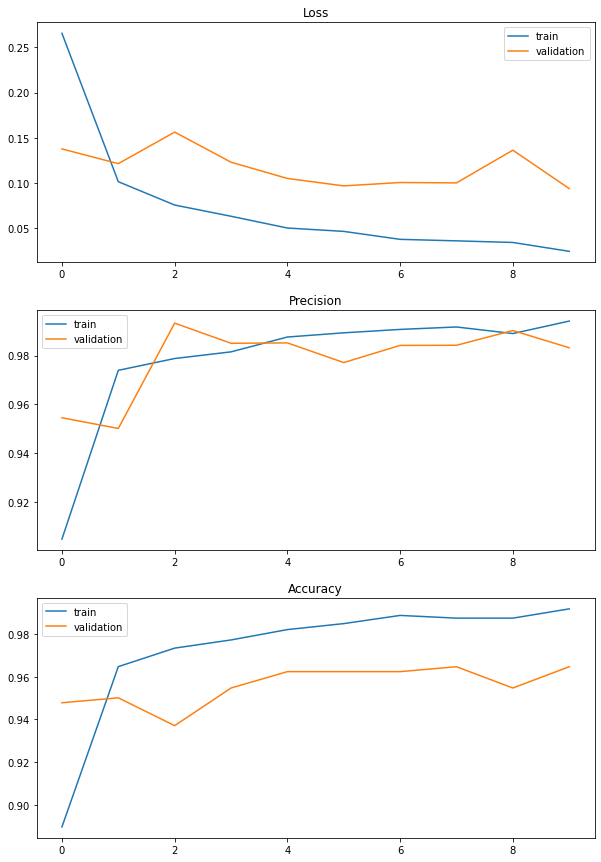

In [8]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Precision', 'BinaryAccuracy'])

results2 = model2.fit(train_generator, epochs=10, validation_data=validation_set)
plot_loss_and_accuracy(results2)

print('''Epoch 1/10
123/123 [==============================] - 68s 549ms/step - loss: 0.2655 - precision: 0.9048 - binary_accuracy: 0.8896 - val_loss: 0.1379 - val_precision: 0.9545 - val_binary_accuracy: 0.9478
Epoch 2/10
123/123 [==============================] - 66s 533ms/step - loss: 0.1017 - precision: 0.9740 - binary_accuracy: 0.9647 - val_loss: 0.1216 - val_precision: 0.9501 - val_binary_accuracy: 0.9501
Epoch 3/10
123/123 [==============================] - 64s 519ms/step - loss: 0.0759 - precision: 0.9788 - binary_accuracy: 0.9734 - val_loss: 0.1565 - val_precision: 0.9933 - val_binary_accuracy: 0.9371
Epoch 4/10
123/123 [==============================] - 63s 515ms/step - loss: 0.0635 - precision: 0.9815 - binary_accuracy: 0.9773 - val_loss: 0.1232 - val_precision: 0.9851 - val_binary_accuracy: 0.9547
Epoch 5/10
123/123 [==============================] - 64s 517ms/step - loss: 0.0505 - precision: 0.9876 - binary_accuracy: 0.9821 - val_loss: 0.1052 - val_precision: 0.9852 - val_binary_accuracy: 0.9624
Epoch 6/10
123/123 [==============================] - 65s 525ms/step - loss: 0.0468 - precision: 0.9893 - binary_accuracy: 0.9849 - val_loss: 0.0971 - val_precision: 0.9772 - val_binary_accuracy: 0.9624
Epoch 7/10
123/123 [==============================] - 67s 542ms/step - loss: 0.0380 - precision: 0.9907 - binary_accuracy: 0.9888 - val_loss: 0.1008 - val_precision: 0.9842 - val_binary_accuracy: 0.9624
Epoch 8/10
123/123 [==============================] - 75s 611ms/step - loss: 0.0364 - precision: 0.9917 - binary_accuracy: 0.9875 - val_loss: 0.1003 - val_precision: 0.9842 - val_binary_accuracy: 0.9647
Epoch 9/10
123/123 [==============================] - 75s 606ms/step - loss: 0.0346 - precision: 0.9890 - binary_accuracy: 0.9875 - val_loss: 0.1365 - val_precision: 0.9903 - val_binary_accuracy: 0.9547
Epoch 10/10
123/123 [==============================] - 75s 610ms/step - loss: 0.0248 - precision: 0.9942 - binary_accuracy: 0.9918 - val_loss: 0.0941 - val_precision: 0.9832 - val_binary_accuracy: 0.9647
''')

Epoch 1/10
123/123 [==============================] - 65s 528ms/step - loss: 0.2544 - precision: 0.9065 - binary_accuracy: 0.8952 - val_loss: 0.1533 - val_precision: 0.9787 - val_binary_accuracy: 0.9478
Epoch 2/10
123/123 [==============================] - 63s 516ms/step - loss: 0.1089 - precision: 0.9703 - binary_accuracy: 0.9614 - val_loss: 0.1505 - val_precision: 0.9923 - val_binary_accuracy: 0.9463
Epoch 3/10
123/123 [==============================] - 65s 526ms/step - loss: 0.0936 - precision: 0.9734 - binary_accuracy: 0.9660 - val_loss: 0.1116 - val_precision: 0.9568 - val_binary_accuracy: 0.9555
Epoch 4/10
123/123 [==============================] - 64s 523ms/step - loss: 0.0625 - precision: 0.9832 - binary_accuracy: 0.9780 - val_loss: 0.1726 - val_precision: 0.9944 - val_binary_accuracy: 0.9332
Epoch 5/10
123/123 [==============================] - 65s 526ms/step - loss: 0.0540 - precision: 0.9849 - binary_accuracy: 0.9798 - val_loss: 0.1550 - val_precision: 0.9956 - val_binary_ac

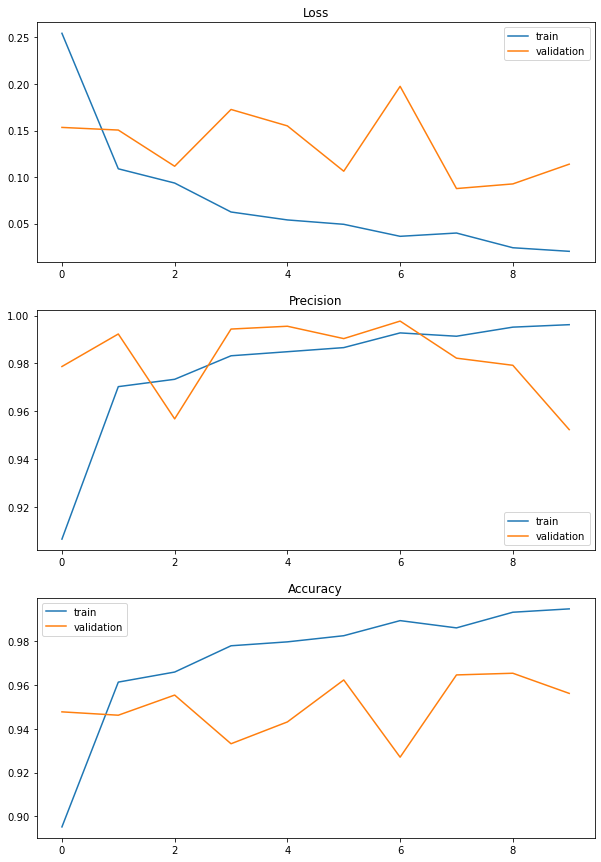

In [13]:
# model3 = models.Sequential()
# model3.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(64, 64, 1)))
# model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model3.add(layers.Flatten())
# model3.add(layers.Dense(64, activation='relu'))
# model3.add(layers.Dense(1, activation='sigmoid'))

# model3.compile(optimizer='Adam',
#               loss='BinaryCrossentropy',
#               metrics=['Precision', 'BinaryAccuracy'])

# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
#                            verbose=1, patience=3,
#                            mode='min')

# results3 = model3.fit(train_generator, epochs=10, validation_data=validation_set,
#                     callbacks=[early_stop])
# plot_loss_and_accuracy(results3)

print('''Epoch 1/10
123/123 [==============================] - ETA: 0s - loss: 0.2544 - precision: 0.9065 - binary_accuracy: 0.8952INFO:tensorflow:Assets written to: ../data/localdata/chest_xray/BestCNNModel/assets
123/123 [==============================] - 65s 528ms/step - loss: 0.2544 - precision: 0.9065 - binary_accuracy: 0.8952 - val_loss: 0.1533 - val_precision: 0.9787 - val_binary_accuracy: 0.9478
Epoch 2/10
123/123 [==============================] - ETA: 0s - loss: 0.1089 - precision: 0.9703 - binary_accuracy: 0.9614INFO:tensorflow:Assets written to: ../data/localdata/chest_xray/BestCNNModel/assets
123/123 [==============================] - 63s 516ms/step - loss: 0.1089 - precision: 0.9703 - binary_accuracy: 0.9614 - val_loss: 0.1505 - val_precision: 0.9923 - val_binary_accuracy: 0.9463
Epoch 3/10
123/123 [==============================] - ETA: 0s - loss: 0.0936 - precision: 0.9734 - binary_accuracy: 0.9660INFO:tensorflow:Assets written to: ../data/localdata/chest_xray/BestCNNModel/assets
123/123 [==============================] - 65s 526ms/step - loss: 0.0936 - precision: 0.9734 - binary_accuracy: 0.9660 - val_loss: 0.1116 - val_precision: 0.9568 - val_binary_accuracy: 0.9555
Epoch 4/10
123/123 [==============================] - 64s 523ms/step - loss: 0.0625 - precision: 0.9832 - binary_accuracy: 0.9780 - val_loss: 0.1726 - val_precision: 0.9944 - val_binary_accuracy: 0.9332
Epoch 5/10
123/123 [==============================] - 65s 526ms/step - loss: 0.0540 - precision: 0.9849 - binary_accuracy: 0.9798 - val_loss: 0.1550 - val_precision: 0.9956 - val_binary_accuracy: 0.9432
Epoch 6/10
123/123 [==============================] - ETA: 0s - loss: 0.0493 - precision: 0.9866 - binary_accuracy: 0.9826INFO:tensorflow:Assets written to: ../data/localdata/chest_xray/BestCNNModel/assets
123/123 [==============================] - 80s 647ms/step - loss: 0.0493 - precision: 0.9866 - binary_accuracy: 0.9826 - val_loss: 0.1063 - val_precision: 0.9904 - val_binary_accuracy: 0.9624
Epoch 7/10
123/123 [==============================] - 77s 622ms/step - loss: 0.0364 - precision: 0.9928 - binary_accuracy: 0.9895 - val_loss: 0.1974 - val_precision: 0.9977 - val_binary_accuracy: 0.9271
Epoch 8/10
123/123 [==============================] - ETA: 0s - loss: 0.0399 - precision: 0.9914 - binary_accuracy: 0.9862INFO:tensorflow:Assets written to: ../data/localdata/chest_xray/BestCNNModel/assets
123/123 [==============================] - 76s 617ms/step - loss: 0.0399 - precision: 0.9914 - binary_accuracy: 0.9862 - val_loss: 0.0877 - val_precision: 0.9822 - val_binary_accuracy: 0.9647
Epoch 9/10
123/123 [==============================] - 75s 611ms/step - loss: 0.0242 - precision: 0.9952 - binary_accuracy: 0.9934 - val_loss: 0.0927 - val_precision: 0.9792 - val_binary_accuracy: 0.9655
Epoch 10/10
123/123 [==============================] - 76s 617ms/step - loss: 0.0203 - precision: 0.9962 - binary_accuracy: 0.9949 - val_loss: 0.1139 - val_precision: 0.9523 - val_binary_accuracy: 0.9563
''')

Epoch 1/10
123/123 [==============================] - 68s 554ms/step - loss: 0.3202 - precision: 0.8718 - binary_accuracy: 0.8694 - val_loss: 0.1981 - val_precision: 0.9820 - val_binary_accuracy: 0.9163
Epoch 2/10
123/123 [==============================] - 68s 554ms/step - loss: 0.1212 - precision: 0.9658 - binary_accuracy: 0.9525 - val_loss: 0.1378 - val_precision: 0.9797 - val_binary_accuracy: 0.9470
Epoch 3/10
123/123 [==============================] - 67s 548ms/step - loss: 0.0898 - precision: 0.9746 - binary_accuracy: 0.9640 - val_loss: 0.1264 - val_precision: 0.9881 - val_binary_accuracy: 0.9501
Epoch 4/10
123/123 [==============================] - 68s 551ms/step - loss: 0.0799 - precision: 0.9811 - binary_accuracy: 0.9719 - val_loss: 0.1067 - val_precision: 0.9811 - val_binary_accuracy: 0.9616
Epoch 5/10
123/123 [==============================] - 69s 558ms/step - loss: 0.0725 - precision: 0.9801 - binary_accuracy: 0.9711 - val_loss: 0.1044 - val_precision: 0.9801 - val_binary_ac

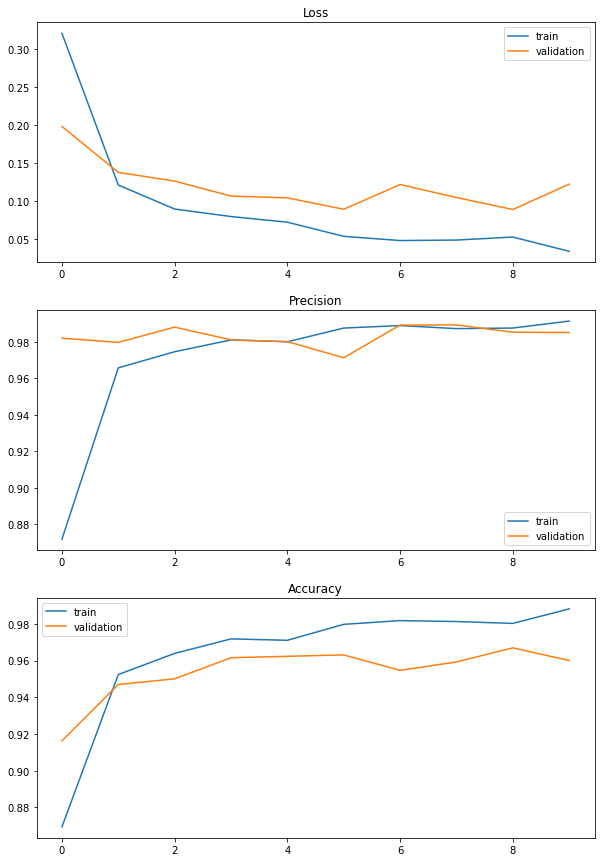

In [12]:
# model4 = models.Sequential()
# model4.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(64, 64, 1)))
# model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model4.add(layers.MaxPooling2D((2, 2)))
# model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model4.add(layers.Flatten())
# model4.add(layers.Dense(64, activation='relu'))
# model4.add(layers.Dense(1, activation='sigmoid'))

# model4.compile(optimizer='Adam',
#               loss='BinaryCrossentropy',
#               metrics=['Precision', 'BinaryAccuracy'])
# results4 = model4.fit(train_generator, epochs=10, validation_data=validation_set)
# plot_loss_and_accuracy(results4)

print('''Epoch 1/10
123/123 [==============================] - 68s 554ms/step - loss: 0.3202 - precision: 0.8718 - binary_accuracy: 0.8694 - val_loss: 0.1981 - val_precision: 0.9820 - val_binary_accuracy: 0.9163
Epoch 2/10
123/123 [==============================] - 68s 554ms/step - loss: 0.1212 - precision: 0.9658 - binary_accuracy: 0.9525 - val_loss: 0.1378 - val_precision: 0.9797 - val_binary_accuracy: 0.9470
Epoch 3/10
123/123 [==============================] - 67s 548ms/step - loss: 0.0898 - precision: 0.9746 - binary_accuracy: 0.9640 - val_loss: 0.1264 - val_precision: 0.9881 - val_binary_accuracy: 0.9501
Epoch 4/10
123/123 [==============================] - 68s 551ms/step - loss: 0.0799 - precision: 0.9811 - binary_accuracy: 0.9719 - val_loss: 0.1067 - val_precision: 0.9811 - val_binary_accuracy: 0.9616
Epoch 5/10
123/123 [==============================] - 69s 558ms/step - loss: 0.0725 - precision: 0.9801 - binary_accuracy: 0.9711 - val_loss: 0.1044 - val_precision: 0.9801 - val_binary_accuracy: 0.9624
Epoch 6/10
123/123 [==============================] - 68s 551ms/step - loss: 0.0539 - precision: 0.9876 - binary_accuracy: 0.9798 - val_loss: 0.0894 - val_precision: 0.9713 - val_binary_accuracy: 0.9632
Epoch 7/10
123/123 [==============================] - 69s 559ms/step - loss: 0.0484 - precision: 0.9890 - binary_accuracy: 0.9819 - val_loss: 0.1219 - val_precision: 0.9892 - val_binary_accuracy: 0.9547
Epoch 8/10
123/123 [==============================] - 68s 556ms/step - loss: 0.0491 - precision: 0.9873 - binary_accuracy: 0.9813 - val_loss: 0.1049 - val_precision: 0.9893 - val_binary_accuracy: 0.9593
Epoch 9/10
123/123 [==============================] - 68s 553ms/step - loss: 0.0530 - precision: 0.9876 - binary_accuracy: 0.9803 - val_loss: 0.0891 - val_precision: 0.9853 - val_binary_accuracy: 0.9670
Epoch 10/10
123/123 [==============================] - 68s 552ms/step - loss: 0.0343 - precision: 0.9914 - binary_accuracy: 0.9882 - val_loss: 0.1224 - val_precision: 0.9852 - val_binary_accuracy: 0.9601
''')

In [6]:
#adjusted learning rate, struggled to converge, we ended it early
# model5 = models.Sequential()
# model5.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(64, 64, 1)))
# model5.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model5.add(layers.Flatten())
# model5.add(layers.Dense(64, activation='relu'))
# model5.add(layers.Dense(1, activation='sigmoid'))

# model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1),
#               loss='BinaryCrossentropy',
#               metrics=['Precision', 'BinaryAccuracy'])

# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
#                            verbose=1, patience=3,
#                            mode='min')

# results5 = model5.fit(train_generator, epochs=10, validation_data=validation_set,
#                     callbacks=[early_stop])
# plot_loss_and_accuracy(results5)

print('''Epoch 1/10
123/123 [==============================] - ETA: 0s - loss: 3040.7871 - precision: 0.7458 - binary_accuracy: 0.6271WARNING:tensorflow:From /Users/Lydia/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
WARNING:tensorflow:From /Users/Lydia/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/training/tracking/tracking.py:111: Layer.updates (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../data/localdata/chest_xray/BestCNNModel/assets
123/123 [==============================] - 93s 754ms/step - loss: 3040.7871 - precision: 0.7458 - binary_accuracy: 0.6271 - val_loss: 0.5703 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 2/10
123/123 [==============================] - 69s 558ms/step - loss: 0.7959 - precision: 0.7455 - binary_accuracy: 0.6678 - val_loss: 0.5973 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 3/10
123/123 [==============================] - 100s 812ms/step - loss: 0.6280 - precision: 0.7427 - binary_accuracy: 0.7148 - val_loss: 0.5924 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 4/10
 41/123 [=========>....................] - ETA: 1:05 - loss: 0.6071 - precision: 0.7398 - binary_accuracy: 0.7294
---------------------------------------------------------------------------
KeyboardInterrupt                         Traceback (most recent call last)''')

Epoch 1/10
123/123 [==============================] - ETA: 0s - loss: 3040.7871 - precision: 0.7458 - binary_accuracy: 0.6271WARNING:tensorflow:From /Users/Lydia/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../data/localdata/chest_xray/BestCNNModel/assets
123/123 [==============================] - 93s 754ms/step - loss: 3040.7871 - precision: 0.7458 - binary_accuracy: 0.6271 - val_loss: 0.5703 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 2/10
123/123 [==============================] - 69s 558ms/step - loss: 0.7959 - precision: 

KeyboardInterrupt: 

In [7]:
# another learning rate adjustment, still too high, I stopped it early because it wasn't improving
# model6 = models.Sequential()
# model6.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(64, 64, 1)))
# model6.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model6.add(layers.Flatten())
# model6.add(layers.Dense(64, activation='relu'))
# # model6.add(layers.Dense(1, activation='sigmoid'))

# model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.1),
#               loss='BinaryCrossentropy',
#               metrics=['Precision', 'BinaryAccuracy'])

# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
#                            verbose=1, patience=3,
#                            mode='min')

# results6 = model6.fit(train_generator, epochs=10, validation_data=validation_set,
#                     callbacks=[early_stop])
# plot_loss_and_accuracy(results6)

print('''Epoch 1/10
123/123 [==============================] - ETA: 0s - loss: 3.6412 - precision: 0.7449 - binary_accuracy: 0.7381INFO:tensorflow:Assets written to: ../data/localdata/chest_xray/BestCNNModel/assets
123/123 [==============================] - 121s 983ms/step - loss: 3.6412 - precision: 0.7449 - binary_accuracy: 0.7381 - val_loss: 0.5700 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 2/10
123/123 [==============================] - ETA: 0s - loss: 0.5719 - precision: 0.7429 - binary_accuracy: 0.7429
---------------------------------------------------------------------------
KeyboardInterrupt                         Traceback (most recent call last)''')

Epoch 1/10
123/123 [==============================] - 121s 983ms/step - loss: 3.6412 - precision: 0.7449 - binary_accuracy: 0.7381 - val_loss: 0.5700 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 2/10
123/123 [==============================] - ETA: 0s - loss: 0.5719 - precision: 0.7429 - binary_accuracy: 0.7429

KeyboardInterrupt: 

Epoch 1/10
123/123 [==============================] - 103s 839ms/step - loss: 0.5214 - precision: 0.8849 - binary_accuracy: 0.8571 - val_loss: 0.2290 - val_precision: 0.9149 - val_binary_accuracy: 0.9156
Epoch 2/10
123/123 [==============================] - 102s 825ms/step - loss: 0.1090 - precision: 0.9689 - binary_accuracy: 0.9583 - val_loss: 0.1469 - val_precision: 0.9628 - val_binary_accuracy: 0.9447
Epoch 3/10
123/123 [==============================] - 99s 808ms/step - loss: 0.0839 - precision: 0.9790 - binary_accuracy: 0.9693 - val_loss: 0.1485 - val_precision: 0.9559 - val_binary_accuracy: 0.9394
Epoch 4/10
123/123 [==============================] - 92s 744ms/step - loss: 0.1173 - precision: 0.9725 - binary_accuracy: 0.9583 - val_loss: 0.1714 - val_precision: 0.9682 - val_binary_accuracy: 0.9355
Epoch 5/10
123/123 [==============================] - 109s 887ms/step - loss: 0.0975 - precision: 0.9750 - binary_accuracy: 0.9655 - val_loss: 0.2512 - val_precision: 0.9954 - val_binary

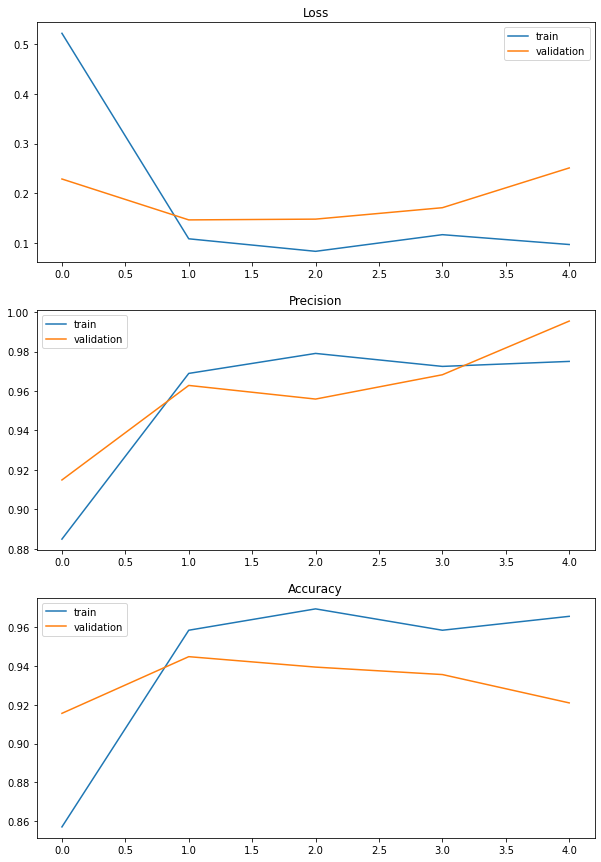

In [11]:
#brought it down again, but still higher than original
# model7 = models.Sequential()
# model7.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(64, 64, 1)))
# model7.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model7.add(layers.Flatten())
# model7.add(layers.Dense(64, activation='relu'))
# model7.add(layers.Dense(1, activation='sigmoid'))

# model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
#               loss='BinaryCrossentropy',
#               metrics=['Precision', 'BinaryAccuracy'])

# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
#                            verbose=1, patience=3,
#                            mode='min')

# results7 = model7.fit(train_generator, epochs=10, validation_data=validation_set,
#                     callbacks=[early_stop])
# plot_loss_and_accuracy(results7)

print('''Epoch 1/10
123/123 [==============================] - ETA: 0s - loss: 0.5214 - precision: 0.8849 - binary_accuracy: 0.8571INFO:tensorflow:Assets written to: ../data/localdata/chest_xray/BestCNNModel/assets
123/123 [==============================] - 103s 839ms/step - loss: 0.5214 - precision: 0.8849 - binary_accuracy: 0.8571 - val_loss: 0.2290 - val_precision: 0.9149 - val_binary_accuracy: 0.9156
Epoch 2/10
123/123 [==============================] - ETA: 0s - loss: 0.1090 - precision: 0.9689 - binary_accuracy: 0.9583INFO:tensorflow:Assets written to: ../data/localdata/chest_xray/BestCNNModel/assets
123/123 [==============================] - 102s 825ms/step - loss: 0.1090 - precision: 0.9689 - binary_accuracy: 0.9583 - val_loss: 0.1469 - val_precision: 0.9628 - val_binary_accuracy: 0.9447
Epoch 3/10
123/123 [==============================] - 99s 808ms/step - loss: 0.0839 - precision: 0.9790 - binary_accuracy: 0.9693 - val_loss: 0.1485 - val_precision: 0.9559 - val_binary_accuracy: 0.9394
Epoch 4/10
123/123 [==============================] - 92s 744ms/step - loss: 0.1173 - precision: 0.9725 - binary_accuracy: 0.9583 - val_loss: 0.1714 - val_precision: 0.9682 - val_binary_accuracy: 0.9355
Epoch 5/10
123/123 [==============================] - 109s 887ms/step - loss: 0.0975 - precision: 0.9750 - binary_accuracy: 0.9655 - val_loss: 0.2512 - val_precision: 0.9954 - val_binary_accuracy: 0.9210
Epoch 00005: early stopping''')

Epoch 1/10
123/123 [==============================] - 101s 824ms/step - loss: 0.4527 - precision: 0.7808 - binary_accuracy: 0.7843 - val_loss: 0.3346 - val_precision: 0.8613 - val_binary_accuracy: 0.8726
Epoch 2/10
123/123 [==============================] - 104s 849ms/step - loss: 0.2546 - precision: 0.9153 - binary_accuracy: 0.9141 - val_loss: 0.2303 - val_precision: 0.9052 - val_binary_accuracy: 0.9133
Epoch 3/10
123/123 [==============================] - 113s 920ms/step - loss: 0.1818 - precision: 0.9477 - binary_accuracy: 0.9389 - val_loss: 0.1927 - val_precision: 0.9165 - val_binary_accuracy: 0.9233
Epoch 4/10
123/123 [==============================] - 96s 783ms/step - loss: 0.1470 - precision: 0.9578 - binary_accuracy: 0.9504 - val_loss: 0.1579 - val_precision: 0.9516 - val_binary_accuracy: 0.9440
Epoch 5/10
123/123 [==============================] - 105s 854ms/step - loss: 0.1238 - precision: 0.9663 - binary_accuracy: 0.9568 - val_loss: 0.1517 - val_precision: 0.9371 - val_binar

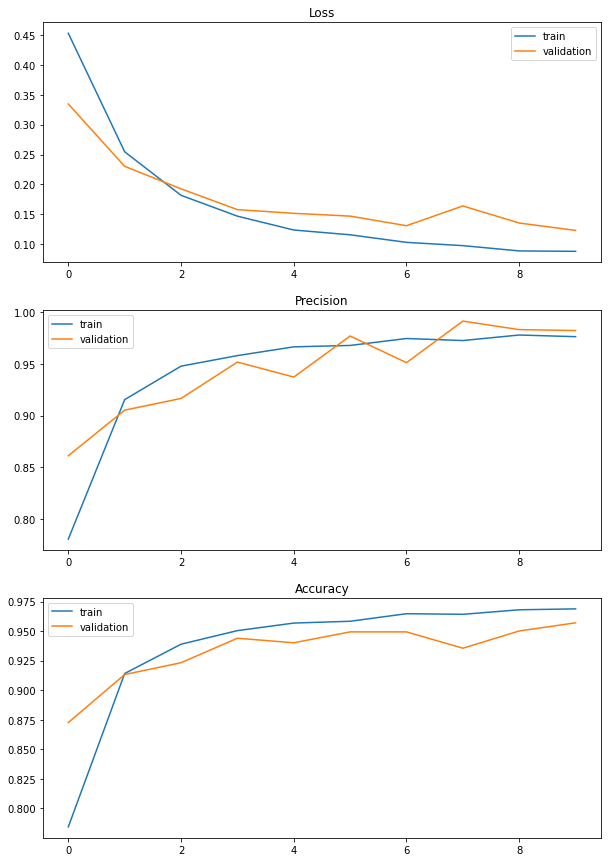

In [12]:
#trying a smaller than normal learning rate too
# model8 = models.Sequential()
# model8.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(64, 64, 1)))
# model8.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model8.add(layers.Flatten())
# model8.add(layers.Dense(64, activation='relu'))
# model8.add(layers.Dense(1, activation='sigmoid'))

# model8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
#               loss='BinaryCrossentropy',
#               metrics=['Precision', 'BinaryAccuracy'])

# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
#                            verbose=1, patience=3,
#                            mode='min')

# results8 = model8.fit(train_generator, epochs=10, validation_data=validation_set,
#                     callbacks=[early_stop])
# plot_loss_and_accuracy(results8)

print('''Epoch 1/10
123/123 [==============================] - 101s 824ms/step - loss: 0.4527 - precision: 0.7808 - binary_accuracy: 0.7843 - val_loss: 0.3346 - val_precision: 0.8613 - val_binary_accuracy: 0.8726
Epoch 2/10
123/123 [==============================] - 104s 849ms/step - loss: 0.2546 - precision: 0.9153 - binary_accuracy: 0.9141 - val_loss: 0.2303 - val_precision: 0.9052 - val_binary_accuracy: 0.9133
Epoch 3/10
123/123 [==============================] - 113s 920ms/step - loss: 0.1818 - precision: 0.9477 - binary_accuracy: 0.9389 - val_loss: 0.1927 - val_precision: 0.9165 - val_binary_accuracy: 0.9233
Epoch 4/10
123/123 [==============================] - 96s 783ms/step - loss: 0.1470 - precision: 0.9578 - binary_accuracy: 0.9504 - val_loss: 0.1579 - val_precision: 0.9516 - val_binary_accuracy: 0.9440
Epoch 5/10
123/123 [==============================] - 105s 854ms/step - loss: 0.1238 - precision: 0.9663 - binary_accuracy: 0.9568 - val_loss: 0.1517 - val_precision: 0.9371 - val_binary_accuracy: 0.9401
Epoch 6/10
123/123 [==============================] - 109s 883ms/step - loss: 0.1158 - precision: 0.9676 - binary_accuracy: 0.9583 - val_loss: 0.1471 - val_precision: 0.9767 - val_binary_accuracy: 0.9493
Epoch 7/10
123/123 [==============================] - 109s 885ms/step - loss: 0.1032 - precision: 0.9743 - binary_accuracy: 0.9647 - val_loss: 0.1310 - val_precision: 0.9510 - val_binary_accuracy: 0.9493
Epoch 8/10
123/123 [==============================] - 110s 898ms/step - loss: 0.0977 - precision: 0.9723 - binary_accuracy: 0.9642 - val_loss: 0.1641 - val_precision: 0.9911 - val_binary_accuracy: 0.9355
Epoch 9/10
123/123 [==============================] - 100s 814ms/step - loss: 0.0889 - precision: 0.9777 - binary_accuracy: 0.9681 - val_loss: 0.1355 - val_precision: 0.9829 - val_binary_accuracy: 0.9501
Epoch 10/10
123/123 [==============================] - 98s 797ms/step - loss: 0.0882 - precision: 0.9761 - binary_accuracy: 0.9688 - val_loss: 0.1232 - val_precision: 0.9820 - val_binary_accuracy: 0.9570''')

Epoch 1/10
123/123 [==============================] - 88s 716ms/step - loss: 0.2496 - precision: 0.9171 - binary_accuracy: 0.9021 - val_loss: 0.1220 - val_precision: 0.9642 - val_binary_accuracy: 0.9547
Epoch 2/10
123/123 [==============================] - 70s 567ms/step - loss: 0.0885 - precision: 0.9780 - binary_accuracy: 0.9691 - val_loss: 0.0950 - val_precision: 0.9793 - val_binary_accuracy: 0.9662
Epoch 3/10
123/123 [==============================] - 75s 610ms/step - loss: 0.0817 - precision: 0.9757 - binary_accuracy: 0.9673 - val_loss: 0.0987 - val_precision: 0.9731 - val_binary_accuracy: 0.9593
Epoch 4/10
123/123 [==============================] - 68s 552ms/step - loss: 0.0633 - precision: 0.9801 - binary_accuracy: 0.9734 - val_loss: 0.0923 - val_precision: 0.9843 - val_binary_accuracy: 0.9678
Epoch 5/10
123/123 [==============================] - 68s 551ms/step - loss: 0.0511 - precision: 0.9870 - binary_accuracy: 0.9826 - val_loss: 0.1670 - val_precision: 0.9944 - val_binary_ac

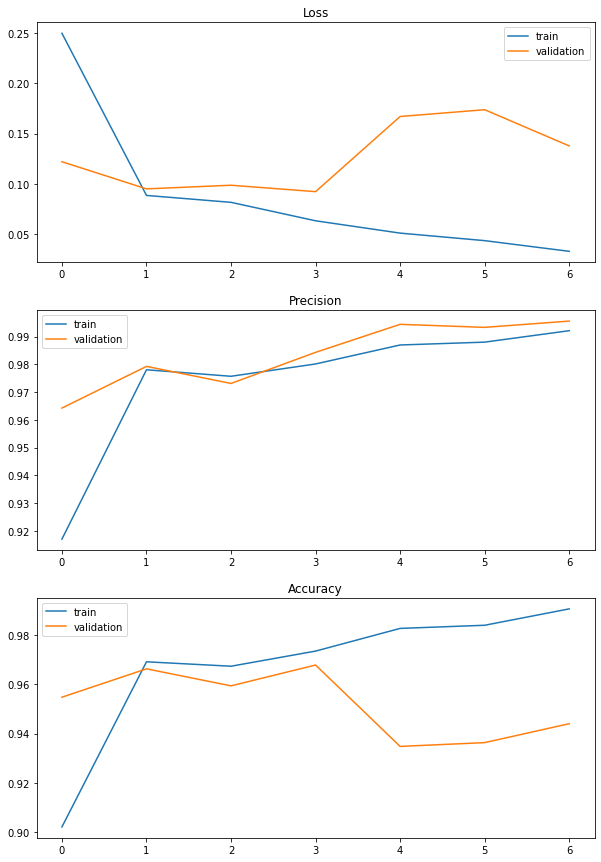

In [14]:
#add a bit of regularization with a dropout layer
# model9 = models.Sequential()
# model9.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(64, 64, 1)))
# model9.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model9.add(layers.Flatten())
# model9.add(layers.Dropout(0.1))
# model9.add(layers.Dense(64, activation='relu'))
# model9.add(layers.Dense(1, activation='sigmoid'))

# model9.compile(optimizer='Adam',
#               loss='BinaryCrossentropy',
#               metrics=['Precision', 'BinaryAccuracy'])

# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
#                            verbose=1, patience=3,
#                            mode='min')

# results9 = model9.fit(train_generator, epochs=10, validation_data=validation_set,
#                     callbacks=[early_stop])
# plot_loss_and_accuracy(results9)

print('''Epoch 1/10
123/123 [==============================] - 88s 716ms/step - loss: 0.2496 - precision: 0.9171 - binary_accuracy: 0.9021 - val_loss: 0.1220 - val_precision: 0.9642 - val_binary_accuracy: 0.9547
Epoch 2/10
123/123 [==============================] - 70s 567ms/step - loss: 0.0885 - precision: 0.9780 - binary_accuracy: 0.9691 - val_loss: 0.0950 - val_precision: 0.9793 - val_binary_accuracy: 0.9662
Epoch 3/10
123/123 [==============================] - 75s 610ms/step - loss: 0.0817 - precision: 0.9757 - binary_accuracy: 0.9673 - val_loss: 0.0987 - val_precision: 0.9731 - val_binary_accuracy: 0.9593
Epoch 4/10
123/123 [==============================] - 68s 552ms/step - loss: 0.0633 - precision: 0.9801 - binary_accuracy: 0.9734 - val_loss: 0.0923 - val_precision: 0.9843 - val_binary_accuracy: 0.9678
Epoch 5/10
123/123 [==============================] - 68s 551ms/step - loss: 0.0511 - precision: 0.9870 - binary_accuracy: 0.9826 - val_loss: 0.1670 - val_precision: 0.9944 - val_binary_accuracy: 0.9348
Epoch 6/10
123/123 [==============================] - 101s 821ms/step - loss: 0.0436 - precision: 0.9880 - binary_accuracy: 0.9839 - val_loss: 0.1737 - val_precision: 0.9933 - val_binary_accuracy: 0.9363
Epoch 7/10
123/123 [==============================] - 95s 773ms/step - loss: 0.0330 - precision: 0.9921 - binary_accuracy: 0.9905 - val_loss: 0.1377 - val_precision: 0.9956 - val_binary_accuracy: 0.9440
Epoch 00007: early stopping''')

In [3]:
#added some image augmentation to our best model--does not seem to help

train_data_dir = '../data/localdata/chest_xray/train'
test_data_dir = '../data/localdata/chest_xray/test'

generator2 = ImageDataGenerator(rescale=1/255, validation_split=0.25,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_generator2= generator2.flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', subset='training', class_mode='binary')
validation_set2=generator2.flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', subset='validation', class_mode='binary')
test_generator2 = generator2.flow_from_directory(
        test_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', class_mode='binary')

train_images2, train_labels2 = next(train_generator2)
test_images2, test_labels2 = next(test_generator2)

Found 3913 images belonging to 2 classes.
Found 1303 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Epoch 1/25
123/123 [==============================] - 55s 450ms/step - loss: 0.5605 - precision: 0.7603 - binary_accuracy: 0.7465 - val_loss: 0.4902 - val_precision: 0.7541 - val_binary_accuracy: 0.7521
Epoch 2/25
123/123 [==============================] - 55s 449ms/step - loss: 0.4286 - precision: 0.8252 - binary_accuracy: 0.7904 - val_loss: 0.4194 - val_precision: 0.8538 - val_binary_accuracy: 0.8104
Epoch 3/25
123/123 [==============================] - 56s 457ms/step - loss: 0.3571 - precision: 0.8665 - binary_accuracy: 0.8339 - val_loss: 0.4297 - val_precision: 0.7876 - val_binary_accuracy: 0.7913
Epoch 4/25
123/123 [==============================] - 59s 476ms/step - loss: 0.3047 - precision: 0.8980 - binary_accuracy: 0.8671 - val_loss: 0.3682 - val_precision: 0.8581 - val_binary_accuracy: 0.8419
Epoch 5/25
123/123 [==============================] - 55s 450ms/step - loss: 0.3039 - precision: 0.9001 - binary_accuracy: 0.8671 - val_loss: 0.3795 - val_precision: 0.9303 - val_binary_ac

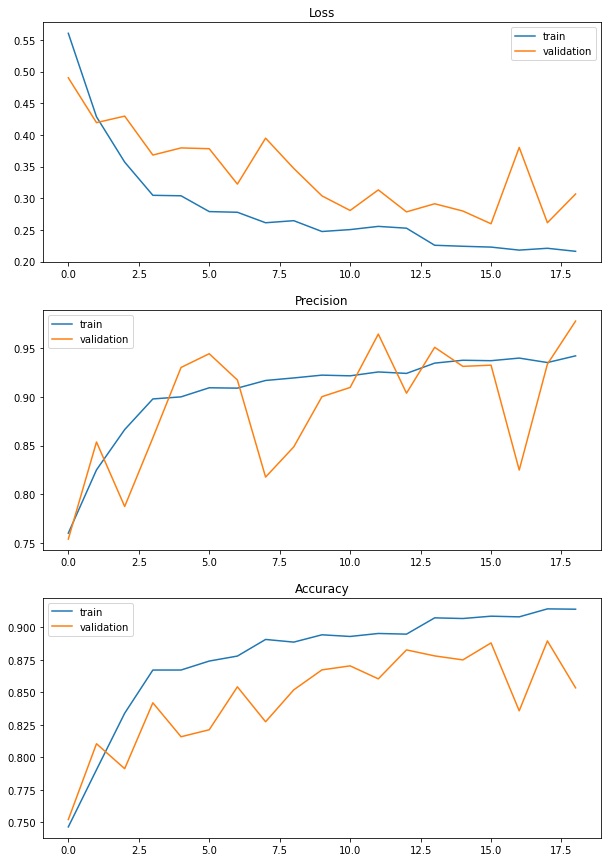

In [8]:
# model10 = models.Sequential()
# model10.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(64, 64, 1)))
# model10.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model10.add(layers.Flatten())
# model10.add(layers.Dropout(0.1))
# model10.add(layers.Dense(64, activation='relu'))
# model10.add(layers.Dense(1, activation='sigmoid'))

# model10.compile(optimizer='Adam',
#               loss='BinaryCrossentropy',
#               metrics=['Precision', 'BinaryAccuracy'])

# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
#                            verbose=1, patience=3,
#                            mode='min')

# results10 = model10.fit(train_generator2, epochs=25, validation_data=validation_set2,
#                     callbacks=[early_stop])
# plot_loss_and_accuracy(results10)

print('''Epoch 1/25
123/123 [==============================] - 55s 450ms/step - loss: 0.5605 - precision: 0.7603 - binary_accuracy: 0.7465 - val_loss: 0.4902 - val_precision: 0.7541 - val_binary_accuracy: 0.7521
Epoch 2/25
123/123 [==============================] - 55s 449ms/step - loss: 0.4286 - precision: 0.8252 - binary_accuracy: 0.7904 - val_loss: 0.4194 - val_precision: 0.8538 - val_binary_accuracy: 0.8104
Epoch 3/25
123/123 [==============================] - 56s 457ms/step - loss: 0.3571 - precision: 0.8665 - binary_accuracy: 0.8339 - val_loss: 0.4297 - val_precision: 0.7876 - val_binary_accuracy: 0.7913
Epoch 4/25
123/123 [==============================] - 59s 476ms/step - loss: 0.3047 - precision: 0.8980 - binary_accuracy: 0.8671 - val_loss: 0.3682 - val_precision: 0.8581 - val_binary_accuracy: 0.8419
Epoch 5/25
123/123 [==============================] - 55s 450ms/step - loss: 0.3039 - precision: 0.9001 - binary_accuracy: 0.8671 - val_loss: 0.3795 - val_precision: 0.9303 - val_binary_accuracy: 0.8158
Epoch 6/25
123/123 [==============================] - 55s 443ms/step - loss: 0.2790 - precision: 0.9094 - binary_accuracy: 0.8740 - val_loss: 0.3782 - val_precision: 0.9444 - val_binary_accuracy: 0.8212
Epoch 7/25
123/123 [==============================] - 56s 458ms/step - loss: 0.2779 - precision: 0.9091 - binary_accuracy: 0.8778 - val_loss: 0.3224 - val_precision: 0.9174 - val_binary_accuracy: 0.8542
Epoch 8/25
123/123 [==============================] - 54s 437ms/step - loss: 0.2613 - precision: 0.9169 - binary_accuracy: 0.8906 - val_loss: 0.3949 - val_precision: 0.8178 - val_binary_accuracy: 0.8273
Epoch 9/25
123/123 [==============================] - 53s 435ms/step - loss: 0.2646 - precision: 0.9195 - binary_accuracy: 0.8886 - val_loss: 0.3471 - val_precision: 0.8488 - val_binary_accuracy: 0.8519
Epoch 10/25
123/123 [==============================] - 53s 434ms/step - loss: 0.2475 - precision: 0.9224 - binary_accuracy: 0.8942 - val_loss: 0.3038 - val_precision: 0.9003 - val_binary_accuracy: 0.8672
Epoch 11/25
123/123 [==============================] - 54s 436ms/step - loss: 0.2505 - precision: 0.9217 - binary_accuracy: 0.8929 - val_loss: 0.2807 - val_precision: 0.9097 - val_binary_accuracy: 0.8703
Epoch 12/25
123/123 [==============================] - 53s 435ms/step - loss: 0.2556 - precision: 0.9257 - binary_accuracy: 0.8952 - val_loss: 0.3132 - val_precision: 0.9645 - val_binary_accuracy: 0.8603
Epoch 13/25
123/123 [==============================] - 53s 430ms/step - loss: 0.2527 - precision: 0.9242 - binary_accuracy: 0.8947 - val_loss: 0.2785 - val_precision: 0.9039 - val_binary_accuracy: 0.8826
Epoch 14/25
123/123 [==============================] - 54s 436ms/step - loss: 0.2258 - precision: 0.9347 - binary_accuracy: 0.9072 - val_loss: 0.2913 - val_precision: 0.9509 - val_binary_accuracy: 0.8780
Epoch 15/25
123/123 [==============================] - 53s 432ms/step - loss: 0.2242 - precision: 0.9377 - binary_accuracy: 0.9067 - val_loss: 0.2798 - val_precision: 0.9314 - val_binary_accuracy: 0.8749
Epoch 16/25
123/123 [==============================] - 53s 431ms/step - loss: 0.2229 - precision: 0.9372 - binary_accuracy: 0.9085 - val_loss: 0.2597 - val_precision: 0.9326 - val_binary_accuracy: 0.8880
Epoch 17/25
123/123 [==============================] - 55s 449ms/step - loss: 0.2181 - precision: 0.9399 - binary_accuracy: 0.9080 - val_loss: 0.3802 - val_precision: 0.8250 - val_binary_accuracy: 0.8358
Epoch 18/25
123/123 [==============================] - 54s 440ms/step - loss: 0.2210 - precision: 0.9353 - binary_accuracy: 0.9141 - val_loss: 0.2614 - val_precision: 0.9337 - val_binary_accuracy: 0.8895
Epoch 19/25
123/123 [==============================] - 55s 449ms/step - loss: 0.2162 - precision: 0.9422 - binary_accuracy: 0.9139 - val_loss: 0.3067 - val_precision: 0.9779 - val_binary_accuracy: 0.8534
Epoch 00019: early stopping''')

In [3]:
#Compare our two best models

print('''model3 precision: 0.9914 - binary_accuracy: 0.9862 - val_precision: 0.9822 - val_binary_accuracy: 0.9647''')
print('''model9 precision: 0.9921 - binary_accuracy: 0.9905 - val_precision: 0.9956 - val_binary_accuracy: 0.9440''')

model3 precision: 0.9914 - binary_accuracy: 0.9862 - val_precision: 0.9822 - val_binary_accuracy: 0.9647
model9 precision: 0.9921 - binary_accuracy: 0.9905 - val_precision: 0.9956 - val_binary_accuracy: 0.9440


Both models are very strong, and quite similar. Model 3 is slightly more precise at the expense of accuracy and model 9 is the opposite. Precision is our most important metric, so model 9 is our optimal choice.

Epoch 1/10
123/123 [==============================] - ETA: 0s - loss: 0.3066 - precision: 0.8945 - binary_accuracy: 0.8876
Epoch 00001: saving model to best_model/cp.ckpt
123/123 [==============================] - 67s 544ms/step - loss: 0.3066 - precision: 0.8945 - binary_accuracy: 0.8876 - val_loss: 0.2183 - val_precision: 0.8849 - val_binary_accuracy: 0.8987
Epoch 2/10
123/123 [==============================] - ETA: 0s - loss: 0.1475 - precision: 0.9582 - binary_accuracy: 0.9461
Epoch 00002: saving model to best_model/cp.ckpt
123/123 [==============================] - 67s 541ms/step - loss: 0.1475 - precision: 0.9582 - binary_accuracy: 0.9461 - val_loss: 0.1203 - val_precision: 0.9739 - val_binary_accuracy: 0.9540
Epoch 3/10
123/123 [==============================] - ETA: 0s - loss: 0.0907 - precision: 0.9777 - binary_accuracy: 0.9696
Epoch 00003: saving model to best_model/cp.ckpt
123/123 [==============================] - 67s 544ms/step - loss: 0.0907 - precision: 0.9777 - binary_a

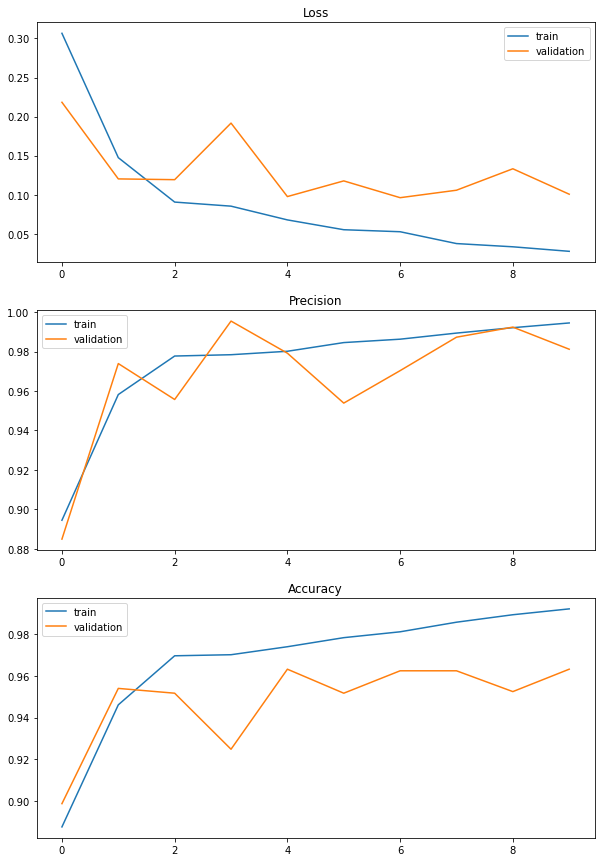

In [22]:
best_model = models.Sequential()
best_model.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
best_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
best_model.add(layers.Flatten())
best_model.add(layers.Dense(64, activation='relu'))
best_model.add(layers.Dense(1, activation='sigmoid'))

best_model.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Precision', 'BinaryAccuracy'])

checkpoint_path = "best_model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

results_best = best_model.fit(train_generator, epochs=10, validation_data=validation_set,
                    callbacks=[cp_callback])
plot_loss_and_accuracy(results_best)

In [23]:
best_model.save('best_model.keras')

In [24]:
best_model.load_weights("best_model/cp.ckpt")

In [25]:
new_model = tf.keras.models.load_model('best_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1968192   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 1,968,577
Trainable params: 1,968,577
Non-trainable params: 0
_________________________________________________________________


In [26]:
new_model.evaluate(test_generator)

20/20 [==============================] - 7s 334ms/step - loss: 1.4365 - precision_1: 0.7005 - binary_accuracy: 0.7292


[1.4364567995071411, 0.7005444765090942, 0.7291666865348816]